# How to use PeakOnly in a Jupyter Notebook or general Python script

Install the `ms-peakonly` library in your environment, e.g. with 

    git clone git@github.com:soerendip/ms-peakonly.git
    cd ms-peakonly
    pip install -e .
    
then you should be able to import _PeakOnly_. 

In [1]:
from ms_peakonly import PeakOnly

## Get a list of files

In [2]:
from glob import glob
fns = glob('/data/Metabolomics/MS-formats/MTBLS1569/mzML/*.mzML')[:2]
fns

['/data/Metabolomics/MS-formats/MTBLS1569/mzML/Control_3h_R2.mzML',
 '/data/Metabolomics/MS-formats/MTBLS1569/mzML/QC_3.mzML']

## Create a peakonly instance

In [3]:
po = PeakOnly(model_dir='/home/swacker/.peak_only')

# Process all files with default parameters

In [4]:
table = po.process(fns)

Finding ROIs...


100%|██████████| 3831/3831 [00:27<00:00, 137.89it/s]


Aligning ROIs...
Finding peaks...


/home/swacker/miniconda3/envs/lrg/lib/python3.8/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/swacker/workspace/ms-peakonly/ms_peakonly/processing_utils/run_utils.py:32: RuntimeWarning: invalid value encountered in true_divide
  signal = torch.tensor(signal / np.max(signal), dtype=torch.float32, device=device)
  0%|          | 0/2 [00:00<?, ?it/s]

total number of features: 380
zero filling...


100%|██████████| 2/2 [00:03<00:00,  1.67s/it]


## The output is a `pandas.DataFrame`

In [5]:
table

mz_mean    rt_min    rt_max  \
0      87.008711  0.311154  0.313969   
1      89.024270  0.149944  0.164925   
2      94.980561  0.447646  0.472093   
3      96.958868  0.301927  0.317091   
4      96.971704  0.226072  0.249500   
..           ...       ...       ...   
375   751.141891  0.255742  0.263471   
376   763.549978  0.053552  0.063208   
377  1078.583961  0.076131  0.077888   
378  1150.355437  0.251438  0.264092   
379  1151.358099  0.255654  0.263763   

     /data/Metabolomics/MS-formats/MTBLS1569/mzML/Control_3h_R2.mzML  \
0                                         4.050207e+04                 
1                                         5.946541e+06                 
2                                         6.354852e+07                 
3                                         1.584294e+07                 
4                                         1.020892e+08                 
..                                                 ...                 
375                                       5.348547e+05                 
376                                       3.140993e+08                 
377                                       0.000000e+00                 
378                                       2.126982e+07                 
379                                       7.515564e+06                 

     /data/Metabolomics/MS-formats/MTBLS1569/mzML/QC_3.mzML  
0                                         6.421246e+05       
1                                         2.078274e+07       
2                                         6.465936e+07       
3                                         6.580472e+07       
4                                         1.606559e+08       
..                                                 ...       
375                                       6.485756e+06       
376                                       3.317957e+08       
377                                       5.453032e+06       
378                                       4.830143e+07       
379                                       8.595165e+06       

[380 rows x 5 columns]

# Process with a different program for comparison and visualization

In [6]:
po.as_peaklist()

peak_label      mz_mean  mz_width         rt     rt_min     rt_max  \
0      87.009@18.75    87.008711        10  18.753693  18.669221  18.838164   
1       89.024@9.45    89.024270        10   9.446067   8.996664   9.895471   
2      94.981@27.59    94.980561        10  27.592176  26.858787  28.325564   
3      96.959@18.57    96.958868        10  18.570537  18.115619  19.025454   
4      96.972@14.27    96.971704        10  14.267152  13.564292  14.970013   
..              ...          ...       ...        ...        ...        ...   
375   751.142@15.58   751.141891        10  15.576390  15.344490  15.808289   
376      763.55@3.5   763.549978        10   3.502801   3.213096   3.792507   
377   1078.584@4.62  1078.583961        10   4.620566   4.567833   4.673300   
378  1150.355@15.47  1150.355437        10  15.465882  15.086251  15.845512   
379  1151.358@15.58  1151.358099        10  15.582508  15.339233  15.825782   

     /data/Metabolomics/MS-formats/MTBLS1569/mzML/Control_3h_R2.mzML  \
0                                         4.050207e+04                 
1                                         5.946541e+06                 
2                                         6.354852e+07                 
3                                         1.584294e+07                 
4                                         1.020892e+08                 
..                                                 ...                 
375                                       5.348547e+05                 
376                                       3.140993e+08                 
377                                       0.000000e+00                 
378                                       2.126982e+07                 
379                                       7.515564e+06                 

     /data/Metabolomics/MS-formats/MTBLS1569/mzML/QC_3.mzML  
0                                         6.421246e+05       
1                                         2.078274e+07       
2                                         6.465936e+07       
3                                         6.580472e+07       
4                                         1.606559e+08       
..                                                 ...       
375                                       6.485756e+06       
376                                       3.317957e+08       
377                                       5.453032e+06       
378                                       4.830143e+07       
379                                       8.595165e+06       

[380 rows x 8 columns]

## Using the Metabolomics Integrator ([MINT](https://github.com/soerendip/ms-mint))

In [7]:
from ms_mint.notebook import Mint

In [8]:
mint = Mint()
mint.peaklist = po.as_peaklist()

In [9]:
mint.peaklist['rt_min'] = mint.peaklist['rt_min']
mint.peaklist['rt_max'] = mint.peaklist['rt_max']
mint.peaklist['mz_width'] = 50

In [10]:
mint.ms_files = fns

In [11]:
mint.progress_bar

IntProgress(value=0, bar_style='info', description='Progress:', layout=Layout(width='90%'))

In [12]:
mint.run()

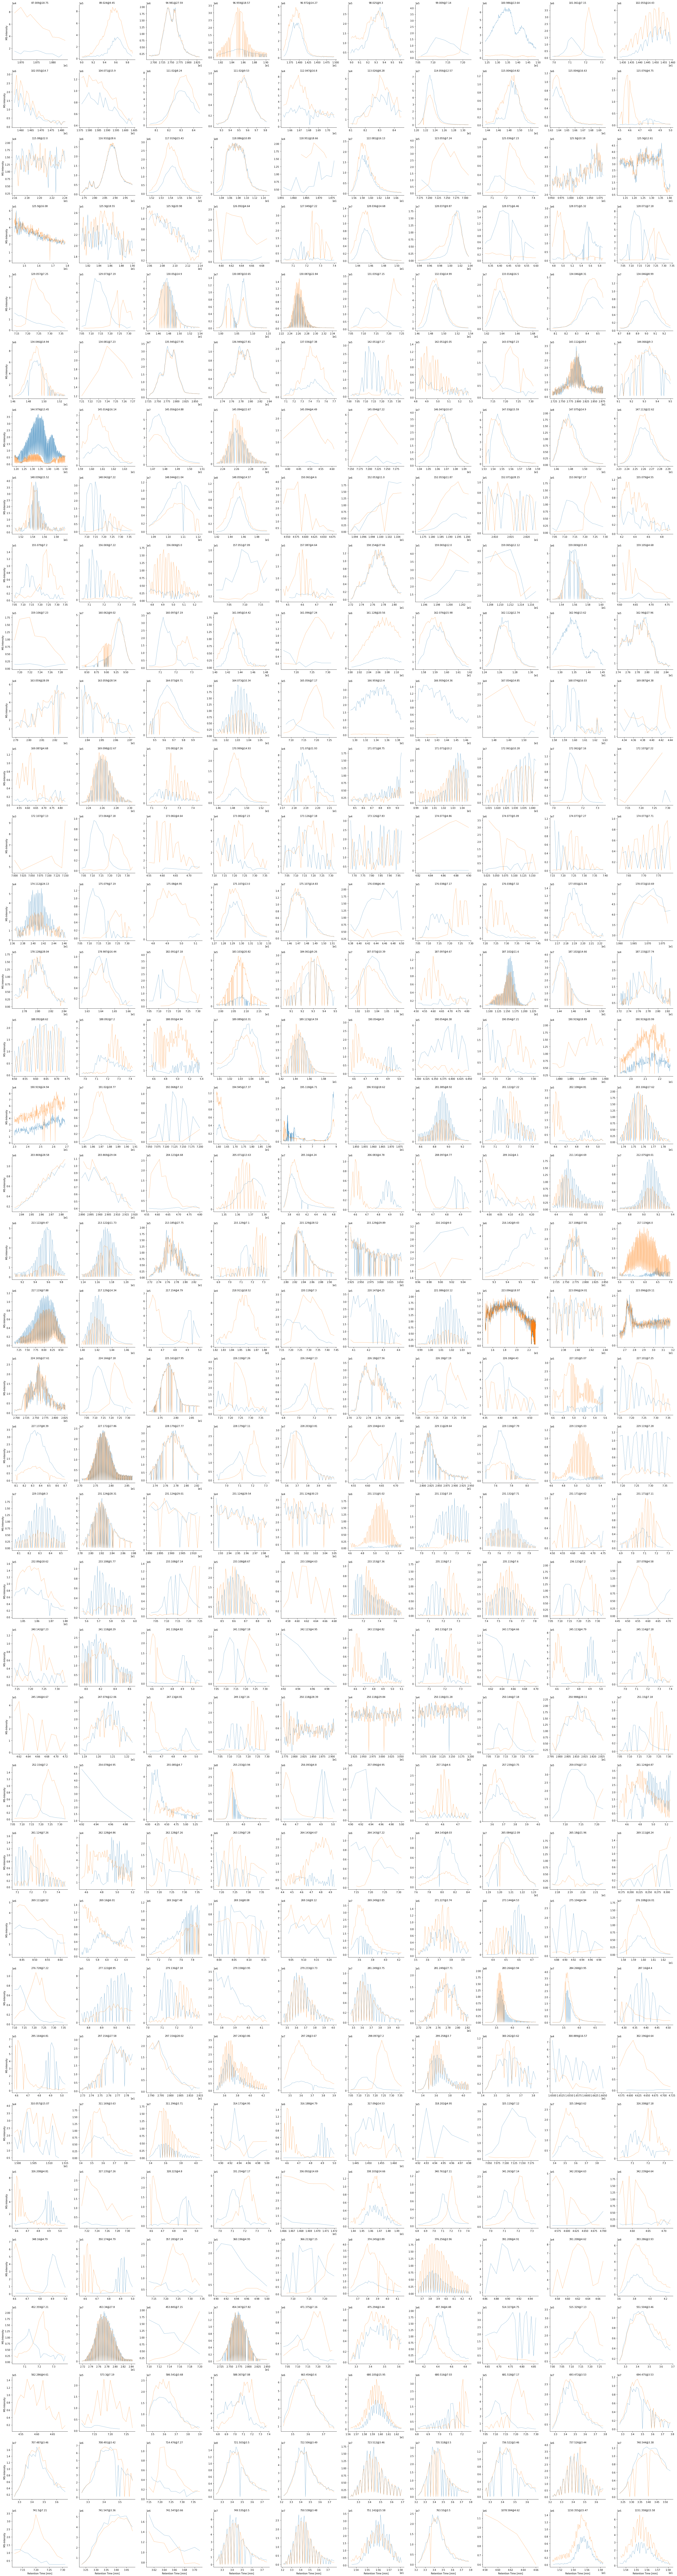

In [13]:
mint.plot_peak_shapes(col_wrap=10)

In [14]:
mint.results

ms_file      peak_label      mz_mean  mz_width         rt  \
0    Control_3h_R2.mzML    87.009@18.75    87.008711        50  18.753693   
1    Control_3h_R2.mzML     89.024@9.45    89.024270        50   9.446067   
2    Control_3h_R2.mzML    94.981@27.59    94.980561        50  27.592176   
3    Control_3h_R2.mzML    96.959@18.57    96.958868        50  18.570537   
4    Control_3h_R2.mzML    96.972@14.27    96.971704        50  14.267152   
..                  ...             ...          ...       ...        ...   
375           QC_3.mzML   751.142@15.58   751.141891        50  15.576390   
376           QC_3.mzML      763.55@3.5   763.549978        50   3.502801   
377           QC_3.mzML   1078.584@4.62  1078.583961        50   4.620566   
378           QC_3.mzML  1150.355@15.47  1150.355437        50  15.465882   
379           QC_3.mzML  1151.358@15.58  1151.358099        50  15.582508   

        rt_min     rt_max  intensity_threshold peaklist_name     peak_area  \
0    18.669221  18.838164                    0       unknown  1.296624e+05   
1     8.996664   9.895471                    0       unknown  6.950668e+06   
2    26.858787  28.325564                    0       unknown  6.498081e+07   
3    18.115619  19.025454                    0       unknown  1.795319e+07   
4    13.564292  14.970013                    0       unknown  1.032328e+08   
..         ...        ...                  ...           ...           ...   
375  15.344490  15.808289                    0       unknown  6.394646e+06   
376   3.213096   3.792507                    0       unknown  3.365169e+08   
377   4.567833   4.673300                    0       unknown  5.470771e+06   
378  15.086251  15.845512                    0       unknown  4.796436e+07   
379  15.339233  15.825782                    0       unknown  1.474255e+07   

     ...  peak_delta_int                                      peak_shape_rt  \
0    ...     6008.728516  18.68,18.7,18.71,18.73,18.75,18.76,18.78,18.8,...   
1    ...    11582.705078  9.01,9.03,9.04,9.06,9.08,9.09,9.11,9.13,9.14,9...   
2    ...    23021.062500  26.88,26.89,26.91,26.93,26.94,26.96,26.98,27.0...   
3    ...    67577.664062  18.13,18.15,18.16,18.18,18.2,18.21,18.23,18.25...   
4    ...   100753.789062  13.58,13.6,13.61,13.63,13.64,13.66,13.68,13.69...   
..   ...             ...                                                ...   
375  ...     1366.507812  15.35,15.36,15.37,15.38,15.39,15.4,15.41,15.42...   
376  ...   747287.187500  3.23,3.24,3.26,3.27,3.29,3.31,3.32,3.34,3.35,3...   
377  ...   539501.187500                       4.58,4.6,4.61,4.63,4.65,4.66   
378  ...     3878.937500  15.09,15.1,15.11,15.12,15.13,15.14,15.15,15.16...   
379  ...    81198.386719  15.35,15.36,15.37,15.38,15.39,15.4,15.41,15.42...   

                                        peak_shape_int  peak_mass_diff_25pc  \
0    15440,10710,15751,14317,16601,15274,11142,1091...             0.938819   
1    25356,22629,22254,22299,29903,25263,33667,3970...             0.932676   
2    171389,193811,187909,175319,165009,158152,2068...             0.390233   
3    123278,127526,147551,180075,199919,220810,2468...           -14.083451   
4    171324,227472,301464,379782,528530,713653,9393...           -20.730371   
..                                                 ...                  ...   
375  30345,26738,42677,29267,49602,66152,40020,5236...            -5.564938   
376  741386,1755391,2852909,4569965,6082861,8176092...            -0.386735   
377       1138597,1070483,1017466,927834,717292,599096             1.662301   
378  86822,141980,92815,144715,196874,129484,222458...            -4.005204   
379  126252,104422,144924,120772,184747,248993,1686...            -4.086759   

     peak_mass_diff_50pc  peak_mass_diff_75pc  peak_score total_intensity  \
0               1.377246             1.969123    0.333454    2.649655e+11   
1               1.361177             1.532577    0.719271    2.649655e+11   
2               0.550885 

# Merge and compare results

In [15]:
from pathlib import Path as P

In [16]:
dfpo = po.as_peaklist().melt(id_vars=['peak_label', 'mz_mean', 'mz_width', 'rt_min', 'rt_max', 'rt'], var_name='ms_file', value_name='PeakOnly')
dfpo

peak_label      mz_mean  mz_width     rt_min     rt_max         rt  \
0      87.009@18.75    87.008711        10  18.669221  18.838164  18.753693   
1       89.024@9.45    89.024270        10   8.996664   9.895471   9.446067   
2      94.981@27.59    94.980561        10  26.858787  28.325564  27.592176   
3      96.959@18.57    96.958868        10  18.115619  19.025454  18.570537   
4      96.972@14.27    96.971704        10  13.564292  14.970013  14.267152   
..              ...          ...       ...        ...        ...        ...   
755   751.142@15.58   751.141891        10  15.344490  15.808289  15.576390   
756      763.55@3.5   763.549978        10   3.213096   3.792507   3.502801   
757   1078.584@4.62  1078.583961        10   4.567833   4.673300   4.620566   
758  1150.355@15.47  1150.355437        10  15.086251  15.845512  15.465882   
759  1151.358@15.58  1151.358099        10  15.339233  15.825782  15.582508   

                                               ms_file      PeakOnly  
0    /data/Metabolomics/MS-formats/MTBLS1569/mzML/C...  4.050207e+04  
1    /data/Metabolomics/MS-formats/MTBLS1569/mzML/C...  5.946541e+06  
2    /data/Metabolomics/MS-formats/MTBLS1569/mzML/C...  6.354852e+07  
3    /data/Metabolomics/MS-formats/MTBLS1569/mzML/C...  1.584294e+07  
4    /data/Metabolomics/MS-formats/MTBLS1569/mzML/C...  1.020892e+08  
..                                                 ...           ...  
755  /data/Metabolomics/MS-formats/MTBLS1569/mzML/Q...  6.485756e+06  
756  /data/Metabolomics/MS-formats/MTBLS1569/mzML/Q...  3.317957e+08  
757  /data/Metabolomics/MS-formats/MTBLS1569/mzML/Q...  5.453032e+06  
758  /data/Metabolomics/MS-formats/MTBLS1569/mzML/Q...  4.830143e+07  
759  /data/Metabolomics/MS-formats/MTBLS1569/mzML/Q...  8.595165e+06  

[760 rows x 8 columns]

In [17]:
dfpo['ms_file'] = dfpo.ms_file.apply(lambda x: P(x).name)

In [18]:
dfpo

peak_label      mz_mean  mz_width     rt_min     rt_max         rt  \
0      87.009@18.75    87.008711        10  18.669221  18.838164  18.753693   
1       89.024@9.45    89.024270        10   8.996664   9.895471   9.446067   
2      94.981@27.59    94.980561        10  26.858787  28.325564  27.592176   
3      96.959@18.57    96.958868        10  18.115619  19.025454  18.570537   
4      96.972@14.27    96.971704        10  13.564292  14.970013  14.267152   
..              ...          ...       ...        ...        ...        ...   
755   751.142@15.58   751.141891        10  15.344490  15.808289  15.576390   
756      763.55@3.5   763.549978        10   3.213096   3.792507   3.502801   
757   1078.584@4.62  1078.583961        10   4.567833   4.673300   4.620566   
758  1150.355@15.47  1150.355437        10  15.086251  15.845512  15.465882   
759  1151.358@15.58  1151.358099        10  15.339233  15.825782  15.582508   

                ms_file      PeakOnly  
0    Control_3h_R2.mzML  4.050207e+04  
1    Control_3h_R2.mzML  5.946541e+06  
2    Control_3h_R2.mzML  6.354852e+07  
3    Control_3h_R2.mzML  1.584294e+07  
4    Control_3h_R2.mzML  1.020892e+08  
..                  ...           ...  
755           QC_3.mzML  6.485756e+06  
756           QC_3.mzML  3.317957e+08  
757           QC_3.mzML  5.453032e+06  
758           QC_3.mzML  4.830143e+07  
759           QC_3.mzML  8.595165e+06  

[760 rows x 8 columns]

In [19]:
dfmint = mint.results.copy()

## Plot PeakOnly values vs MINT values

In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/swacker/miniconda3/envs/lrg/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['table']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [21]:
import pandas as pd

In [22]:
df = pd.merge(dfmint, dfpo[['peak_label', 'ms_file', 'PeakOnly']], on=['peak_label', 'ms_file'])

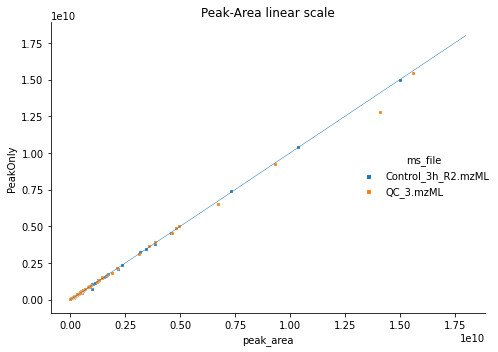

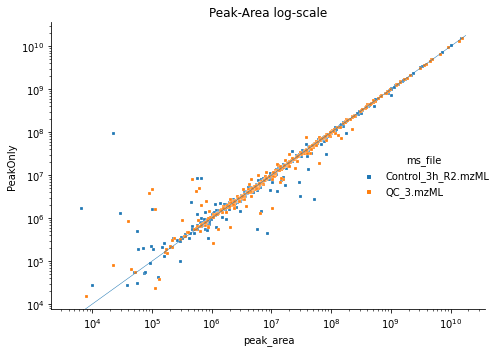

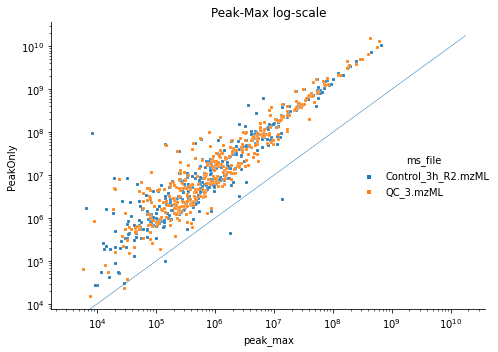

In [23]:
import seaborn as sns
g = sns.relplot(data=df, x='peak_area', y='PeakOnly', hue='ms_file')
title('Peak-Area linear scale')
plot([0,1.8e10], [0,1.8e10])
show()

g = sns.relplot(data=df, x='peak_area', y='PeakOnly', hue='ms_file')
g.set(xscale='log', yscale='log')
title('Peak-Area log-scale')
plot([0,1.8e10], [0,1.8e10])
show()

g = sns.relplot(data=df, x='peak_max', y='PeakOnly', hue='ms_file')
g.set(xscale='log', yscale='log')
plot([0,1.8e10], [0,1.8e10])
title('Peak-Max log-scale')
show()

The values that PeakOnly extracts are the areas under the peak or the summed up intensities. However, in some cases the values are different from the MINT values.

## Percentage Error

In [24]:
df['percentage_error'] = 100 * (df.peak_area - df.PeakOnly) / (df[['peak_area', 'PeakOnly']].max(axis=1)+1)

Text(0.5, 0, 'Percentage Error [%]')

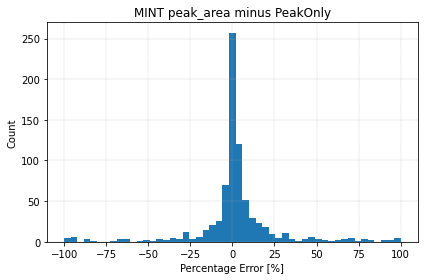

In [25]:
df.percentage_error.hist(bins=51, range=(-100, 100))
title('MINT peak_area minus PeakOnly')
ylabel('Count')
xlabel('Percentage Error [%]')

In [26]:
df = df.sort_values('percentage_error')

In [27]:
df

ms_file     peak_label     mz_mean  mz_width         rt  \
107  Control_3h_R2.mzML  167.054@14.85  167.054263        50  14.852662   
120  Control_3h_R2.mzML   172.107@7.13  172.107069        50   7.125467   
404           QC_3.mzML  118.951@18.66  118.951286        50  18.657981   
119  Control_3h_R2.mzML   172.107@7.22  172.106780        50   7.221798   
499           QC_3.mzML   172.107@7.22  172.106780        50   7.221798   
..                  ...            ...         ...       ...        ...   
641           QC_3.mzML   254.078@4.95  254.078387        50   4.953981   
234  Control_3h_R2.mzML   233.108@4.63  233.108024        50   4.627161   
158  Control_3h_R2.mzML  190.919@18.89  190.919210        50  18.887468   
309  Control_3h_R2.mzML   302.196@4.64  302.195915        50   4.644851   
310  Control_3h_R2.mzML  310.057@15.07  310.057244        50  15.071335   

        rt_min     rt_max  intensity_threshold peaklist_name      peak_area  \
107  14.615385  15.089939                    0       unknown   22814.626465   
120   7.001576   7.249357                    0       unknown    6687.283203   
404  18.547458  18.768505                    0       unknown  101310.272461   
119   7.114426   7.329169                    0       unknown   29641.670898   
499   7.114426   7.329169                    0       unknown   90292.209961   
..         ...        ...                  ...           ...            ...   
641   4.904886   5.003076                    0       unknown    4428.174316   
234   4.573125   4.681196                    0       unknown    7558.101074   
158  18.768049  19.006887                    0       unknown   13338.045654   
309   4.567563   4.722140                    0       unknown  187604.653320   
310  14.983787  15.158884                    0       unknown  242511.679688   

     ...                                     peak_shape_int  \
107  ...                                     6591,8382,7840   
120  ...                                               6687   
404  ...                16458,15353,16924,20278,16993,15302   
119  ...                                    5109,19051,5480   
499  ...                               8552,4911,9214,62275   
..   ...                                                ...   
641  ...                                               4428   
234  ...                                               7558   
158  ...                                3426,2981,3659,3270   
309  ...    13767,22137,13724,12922,12126,37212,43060,32653   
310  ...  18818,10928,23530,8412,35976,15087,12163,15776...   

     peak_mass_diff_25pc  peak_mass_diff_50pc  peak_mass_diff_75pc  \
107            20.216605            21.267019            22.774134   
120            -8.586732            -8.586732            -8.586732   
404             0.467626             0.579869             1.028841   
119           -20.384041             9.050697            10.646556   
499           -49.286826            -8.681073            -6.287284   
..                   ...                  ...                  ...   
641             1.790496             1.790496             1.790496   
234           -21.174330           -21.174330           -21.174330   
158            -2.625190            -2.305499            -0.467275   
309            37.694160            38.047612            38.729268   
310           -15.234465           -11.592717            15.671181   

     peak_score  total_intensity  \
107    0.107233     2.649655e+11   
120    0.046131     2.649655e+11   
404    0.255149     2.954080e+11   
119    0.133748     2.649655e+11   
499    0.030593     2.954080e+11   
..          ...              ...   
641    0.049078     2.954080e+11   
234    0.047629     2.649655e+11   
158    0.186378     2.649655e+11   
309    0.204933     2.649655e+11   
310    0.536530     2.649655e+11   

                                          ms_path ms_file_size      PeakOnly  \
107  /data/Metabolomics/MS-formats/MTBLS1569/mzML    41

The percentage error is centered around zero. The differences are most likely due to differences in the peak-width. For MINT a peak-width of 50ppm of the ion mass was used. 